In [21]:
#importing nessesary liberaries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [22]:
# loading data in pandas datagframe
df_train = pd.read_csv('sign_mnist_train.csv')

In [23]:
# thats how our data looks like
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [24]:
# checking for any null value in data
df_train.isna().any()[lambda x:x]

Series([], dtype: bool)

In [25]:
# finding how many classes are there
np.unique(df_train.label)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [26]:
# extracting labels
labels = np.array(df_train.iloc[:,0])
labels = labels.reshape(-1,1)


In [27]:
# conveting labels in on hot encoded form
labels_encoded = to_categorical(labels, num_classes = 25)

In [28]:
# extracting pixels
pixels = np.array(df_train.drop(['label'],axis=1))

In [29]:
# converting our pixels values in a image grid
pixels = pixels.reshape(-1,28,28,1)

In [60]:
# lets take an example
example = pixels[0]

In [61]:
example = example.reshape(28,28)

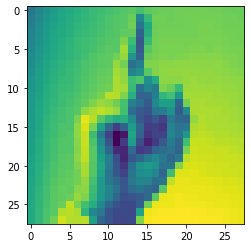

In [62]:
# it looks meaningful
plt.imshow(example)

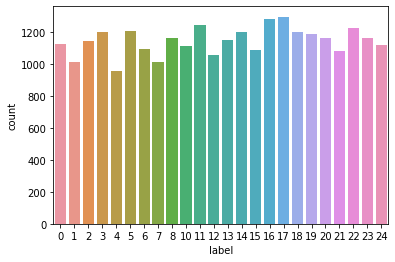

In [33]:
# lets see how the data is distributed among classes
sns.countplot(x='label',data=df_train)

In [34]:
# normaliing them
pixels = pixels/255

In [36]:
# spliting our data for validation and train
pixels_train,pixels_val,labels_encoded_train,labels_encoded_val = train_test_split(pixels , labels_encoded,test_size = 0.2)

In [37]:
# importing lberaries for model
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D,Dropout,Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [38]:
# making distorted data
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [39]:
# fitting the distortion to our training data
datagen.fit(pixels_train)

In [40]:
# makeing a convolutional net

model = Sequential()
model.add(Conv2D(32, (5,5),activation='relu',input_shape=pixels.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3) ,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3) ,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(25, activation='softmax'))

In [41]:
# using Adam optimizer for optimization
opt = Adam(learning_rate = 0.008,beta_1=0.9,beta_2 = 0.999)
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])

In [42]:
# fitting our model
model.fit(datagen.flow(pixels_train,labels_encoded_train, batch_size=86),epochs=10)

Epoch 1/10
256/256 [==============================] - 13s 52ms/step - loss: 1.3300 - accuracy: 0.6077
Epoch 2/10
256/256 [==============================] - 7s 26ms/step - loss: 0.2548 - accuracy: 0.9158
Epoch 3/10
256/256 [==============================] - 7s 26ms/step - loss: 0.1307 - accuracy: 0.9553
Epoch 4/10
256/256 [==============================] - 7s 26ms/step - loss: 0.0883 - accuracy: 0.9712
Epoch 5/10
256/256 [==============================] - 7s 27ms/step - loss: 0.0794 - accuracy: 0.9747
Epoch 6/10
256/256 [==============================] - 7s 27ms/step - loss: 0.0733 - accuracy: 0.9771
Epoch 7/10
256/256 [==============================] - 7s 28ms/step - loss: 0.0511 - accuracy: 0.9838
Epoch 8/10
256/256 [==============================] - 7s 27ms/step - loss: 0.0538 - accuracy: 0.9832
Epoch 9/10
256/256 [==============================] - 7s 26ms/step - loss: 0.0486 - accuracy: 0.9851
Epoch 10/10
256/256 [==============================] - 7s 26ms/step - loss: 0.0416 - accur

In [43]:
# evaluating on validation set
model.evaluate(pixels_val,labels_encoded_val)

5491/5491 [==============================] - 1s 256us/step


[0.0030310341506939566, 0.9983609318733215]

In [52]:
# importing joblib to store our trained model
from sklearn.externals import joblib

C:\Users\91946\anaconda3\envs\gputest\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [55]:
# filename for our model
filename = "hand_sign_mdel.pkl"

In [57]:
# saving our model
joblib.dump(model,filename)

['hand_sign_mdel.pkl']

In [44]:
y_pred = model.predict(pixels)

In [45]:
ypred  = np.argmax(y_pred,axis=1)
ypred = ypred.reshape(ypred.shape[0],1)

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(labels,ypred)
cm = cm/cm.sum(axis=1)

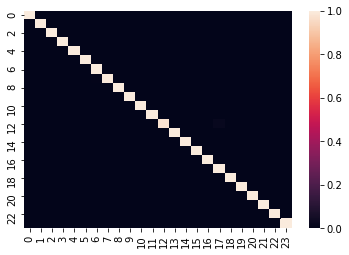

In [104]:
# visuaizing the accuracy for each class
sns.heatmap(cm)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
# how is the accuracy
accuracy_score(labels,ypred)

0.9987980331451466

In [71]:
# loding our test data
df_test = pd.read_csv('sign_mnist_test.csv')

In [76]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [98]:
labels_test = np.array(df_test['label'])
labels_test = labels_test.reshape(-1,1)

In [99]:
labels_test_encoded = to_categorical(labels_test , num_classes = 25)

In [100]:
pixels_test = np.array(df_test.drop(['label'],axis=1))
pixels_test = pixels_test.reshape(-1,28,28,1)

In [101]:
pixels_test = pixels_test/255

In [102]:
# evaluating our model on test data
model.evaluate(pixels_test,labels_test_encoded)

7172/7172 [==============================] - 1s 141us/step


[0.005067650131943541, 0.9981874227523804]